In [89]:
import pandas as pd
import numpy as np
import statistics
import math
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('data.csv')
#pd.options.display.max_rows = 100

In [106]:
#basically shows the data frame
#uncomment to see the data frame
df.head()

,periodid,periodname,periodcode,perioddescription,dataid,dataname,datacode,datadescription,baringo,bomet,...,siaya,taita,tanariver,tharaka,transzoia,turkana,uasingishu,vihiga,wajir,westpokot
0,202201,January 2022,202201,0.0,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,0.0,0.0,2644.0,626.0,...,67556.0,496.0,4000.0,1148.0,4598.0,31277.0,3127.0,29950.0,1146.0,8189.0
1,202202,February 2022,202202,0.0,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,0.0,0.0,3529.0,444.0,...,52890.0,983.0,2889.0,1398.0,5390.0,23382.0,2006.0,20458.0,1197.0,6908.0
2,202203,March 2022,202203,0.0,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,0.0,0.0,2998.0,460.0,...,50940.0,1015.0,2392.0,671.0,6367.0,19729.0,2093.0,19161.0,885.0,6343.0
3,202204,April 2022,202204,0.0,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,0.0,0.0,2755.0,508.0,...,41512.0,698.0,1567.0,509.0,5187.0,22980.0,1221.0,18753.0,936.0,9657.0
4,202205,May 2022,202205,0.0,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,0.0,0.0,2878.0,355.0,...,63304.0,748.0,2239.0,1507.0,11820.0,35963.0,1595.0,34762.0,1236.0,13388.0


In [92]:
#get the columns
#uncomment to run
df.columns


0     202201
1     202202
2     202203
3     202204
4     202205
5     202206
6     202207
7     202208
8     202209
9     202210
10    202211
11    202212
12    202101
13    202102
14    202103
15    202104
16    202105
17    202106
18    202107
19    202108
20    202109
21    202110
22    202111
23    202112
24    202001
25    202002
26    202003
27    202004
28    202005
29    202006
30    202007
31    202008
32    202009
33    202010
34    202011
35    202012
36    201901
37    201902
38    201903
39    201904
40    201905
41    201906
42    201907
43    201908
44    201909
45    201910
46    201911
47    201912
48    201801
49    201802
50    201803
51    201804
52    201805
53    201806
54    201807
55    201808
56    201809
57    201810
58    201811
59    201812
Name: periodid, dtype: int64

In [93]:
#get the info and shape
#uncomment to run
#df.info()
#df.shape

In [94]:
#rename the columns
new_names  = {"Baringo County": 'baringo', "Bomet County": 'bomet', "Bungoma County": 'bungoma', "Busia County": 'busia', "Elgeyo Marakwet County": 'elgeyo',
               "Embu County": 'embu', "Garissa County": 'garissa', "Homa Bay County": 'homabay', "Isiolo County": 'isiolo', "Kajiado County": 'kajiado',
                "Kakamega County": 'kakamega', "Kericho County": 'kericho', "Kiambu County": 'kiambu', "Kilifi County": 'kilifi', "Kirinyaga County": 'kirinyaga',
                "Kisii County": 'kisii', "Kisumu County": 'kisumu', "Kitui County": 'kitui', "Kwale County": 'kwale', "Laikipia County": 'laikipia', "Lamu County": 'lamu',
                "Machakos County": 'machakos', "Makueni County": 'makueni', "Mandera County": 'mandera', "Marsabit County": 'marsabit', "Meru County": 'meru', "Migori County": 'migori',
                "Mombasa County": 'mombasa', "Muranga County": 'muranga', "Nairobi County": 'nairobi', "Nakuru County": 'nakuru', "Nandi County": 'nandi', "Narok County": 'narok',
                "Nyamira County": 'nyamira', "Nyandarua County": 'nyandarua', "Nyeri County": 'nyeri', "Samburu County": 'samburu', "Siaya County": 'siaya', "Taita Taveta County": 'taita', 
                "Tana River County": 'tanariver', "Tharaka Nithi County": 'tharaka', "Trans Nzoia County": 'transzoia', "Turkana County": 'turkana', "Uasin Gishu County": 'uasingishu',
                "Vihiga County": 'vihiga', "Wajir County": 'wajir', "West Pokot County": 'westpokot'}

df.rename(columns=new_names, inplace=True)
#df['baringo']

In [107]:
#get all period ids -> so as to get specific data in each county 
#with these ids we can get totals across months 
#1.per month first
period_ids  =  [ period for period in df['periodid']]
period_names = [ periodname for periodname in df['periodname']]


In [96]:

#getting total nulls for each county
def check_null_values(county=None):
    if county == None:

        for k,v in new_names.items():
            total_null = df[v]
            print(f"{k} -> {total_null}")
    elif county != None:

        total_null = df[county]
        print(f"{county} has {total_null}s")

#check_null_values()



In [97]:
#replace null value with 0
null_values = {}
def fillna(county=None):
    if county == None:
        for k,v in new_names.items():
            #get the total of missing values 
            total_null = [df[v] > 202]
            print(f"{k} -> {total_null}")
    elif county != None:

        total_null = df[county].isnull().sum()
        print(f"{county} has {total_null}s")
#fillna()
df.fillna(0, inplace=True)

In [98]:

###############################################################
##
## MONTH : BASED ON MONTH   AND PER CERTAIN ID                     
##I.E 202212 DATA COLLECTED ON 2022 , 12TH DEC EACH CPUNTY
###############################################################
#a function to dispaly total items per county 
#each county each period
county_monthly_consumption = []
county_names  = []
def all_items(county=None,periodid=None):
    county_monthly_consumption.clear()
    county_names.clear()
    try:
        if county == None and periodid == None:
            for periodid in period_ids:

                val = df.loc[df['periodid']==periodid].sum()

                for k,v in new_names.items():
                    #print(v)
                    commodity_total = val[v]
                    print(f"{v} has {commodity_total} kits in {periodid}")

        elif county == None and periodid != None:
    
            val = df.loc[df['periodid']==periodid].sum()

            for k,v in new_names.items():
                #print(v)
                commodity_total = val[v]
                county_monthly_consumption.append(commodity_total)
                county_names.append(v)#
                
                print(f"{v} has {commodity_total} kits in {periodid}")
            #print(county_monthly_consumption)

        elif county != None and periodid != None:

            val = df.loc[df['periodid']==periodid].sum()
        
            commodity_total = val[county]
            
            print(f"{county} has {commodity_total} kits in {periodid}")

        elif county != None:

            for periodid in period_ids:

                val = df.loc[df['periodid']==periodid].sum()

                commodity_total = val[county]
                print(f"{county} has {commodity_total} kits in {periodid}")

        else:

            print("A grave error, an error that should'nt occur has occurred!")

    except Exception as e:

        if e.__class__.__name__ == 'KeyError':
            print("An error occurred please report it out!")

#all_items()

In [99]:
#the following function plots the results per month against year
#X-axis has total number of commodities sent that year
#Y-axis has the counties 

#all_items(periodid=201801)
def per_year_plot(year):
    #get values for each county(y axis) in a list
    all_items(periodid=year)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = county_names
    students = county_monthly_consumption
    ax.bar(langs,students)
    plt.xticks(rotation=90)
    plt.show()
    

#per_year_plot(201812)

In [100]:
###############################################################
#get total, mean and median for every row (each  month begin from 202201 to 201812)
#ie summation across january on 2021 or accross feb
#import numpy to get mean
#get data for each county and  whole year for rows
###############################################################
years = [2018, 2019,2020,2021,2022]
total_items_each_row = []
county_yearly_vals = []
def total_items_per_row(period=None,county=None):
    total_items_each_row.clear()
    
    try:
        row_data = df.loc[df['periodid'] == period].sum()
        
        for k,v in new_names.items():
                #print(k,row_data[v],period)
                total_items_each_row.append(row_data[v])
        
        #print(statistics.fmean(total_items_each_row))
        total_items_per_period = np.sum(total_items_each_row)
        mean_total_items = np.mean(total_items_each_row)
        median_total_items = np.median(total_items_each_row)

        return {"sum": total_items_per_period, "mean": math.floor(mean_total_items), "median": median_total_items}

    except Exception as e:
        print("Wasn't supposed to happen!")


         

#total_items_per_row(202201)

In [101]:
###############################################################
#get total, mean and median for every column (each  year begin from 202201 to 201812)
#ie summation from jan to dec each year
#
###############################################################

county_yearly_vals = []
def total_items_per_column(period=None,county=None):
    
    county_yearly_vals.clear()
   
    if county == None:
        print("Please select a county for now!")
    else: 
        try:
            #select the column data("county")
            county_values = df[county]
            #print(period)
            column_data = county_values.loc[df['periodid'] == period].sum()
            
            return column_data
            """for k,v in new_names.items():
                    total_items_each_row.append(row_data[v])
            
            total_items_per_period = np.sum(total_items_each_row)
            mean_total_items = np.mean(total_items_each_row)
            median_total_items = np.median(total_items_each_row)

            return {"sum": total_items_per_period, "mean": math.floor(mean_total_items), "median": median_total_items}"""

        except Exception as e:
            print("Wasn't supposed to happen!")

         

#total_items_per_row(202201)

In [102]:
#get data for each county and  whole year
###########################################################################################
## EACH COUNTY GETS TOTAL DATA FOR A PARTICULAR YEAR                                    ###  
##I.E TAKES A PARTICULAR YEAR AND COUNTY, GETS THE DATA BY LOOPING THROUGH EACH MONTH  ###
#########################################################################################
county_yearly_report = {}
def county_yearly_reports():
    
    #2022,2021,2020,2019,2018

    for year in years:
            #print(year)
            #locate all rows with specific years
            #total_mean = []
            total_sum = {}
            total_per_column = []
            #total_median = []

            for period in period_ids:
                
                if str(period)[:4] == str(year):
                    values = total_items_per_column(period=period,county='baringo')
                    total_per_column.append(values)
# 
county_yearly_reports()
    

In [103]:
#get total sum, mean and median per year
#the dict takes in a specific year and the total
###############################################################
##
## MONTH : BASED ON YEARS AND SUMS ACROSS ALL COUNTIES                    
##I.E TAKES A PARTICULAR YEAR AND GETS THE DATA ACROSS AND SUMS ALL FOR THAT YEAR LOOPING THROUGH EACH
###############################################################
yearly_report = {}
def yearly_reports(year=None):
    
    #2022,2021,2020,2019,2018

    for year in years:
            #locate all rows with specific years
            total_mean = []
            total_sum = []
            total_median = []
            for period in period_ids:
                if str(period)[:4] == str(year):
                    values = total_items_per_row(period)
                    #print(values, period)
                    total_sum.append(values['sum'])
                    total_mean.append(values['mean'])
                    total_median.append(values['median'])
            #print(monthly_totals)
            sums = np.sum(total_sum)
            mean = np.sum(total_mean)
            median = np.sum(total_median)
           
            yearly_report[year] = {"sum": sums, "mean": mean, "median": median}
    #print(yearly_report)

yearly_reports()
    

In [104]:
##get summation of the total in all those years present
summation = {}
def year_summation():
    #loop through yearly reports to get general total supplied for the past 5 years
    sums = []
    mean = []
    median = []
    for k,v in yearly_report.items():

        sums.append(v['sum'])
        mean.append(v['mean'])
        median.append(v['median'])

    summation_of_sums = np.sum(sums)
    summation_of_mean = np.sum(mean)
    summation_of_median = np.sum(median)

    summation['all_annual_total'] = {'annual_total': summation_of_sums,
                                      'annual_mean': summation_of_mean,
                                      'annual_median': summation_of_median,
                                      } 
    
year_summation()

baringo has 2644.0 kits in 202201
bomet has 626.0 kits in 202201
bungoma has 24500.0 kits in 202201
busia has 46485.0 kits in 202201
elgeyo has 2055.0 kits in 202201
embu has 874.0 kits in 202201
garissa has 1003.0 kits in 202201
homabay has 50250.0 kits in 202201
isiolo has 116.0 kits in 202201
kajiado has 1673.0 kits in 202201
kakamega has 60594.0 kits in 202201
kericho has 177.0 kits in 202201
kiambu has 306.0 kits in 202201
kilifi has 33067.0 kits in 202201
kirinyaga has 112.0 kits in 202201
kisii has 7905.0 kits in 202201
kisumu has 43045.0 kits in 202201
kitui has 2040.0 kits in 202201
kwale has 38028.0 kits in 202201
laikipia has 330.0 kits in 202201
lamu has 568.0 kits in 202201
machakos has 565.0 kits in 202201
makueni has 3672.0 kits in 202201
mandera has 34.0 kits in 202201
marsabit has 445.0 kits in 202201
meru has 2773.0 kits in 202201
migori has 63834.0 kits in 202201
mombasa has 2864.0 kits in 202201
muranga has 24.0 kits in 202201
nairobi has 3519.0 kits in 202201
nakur

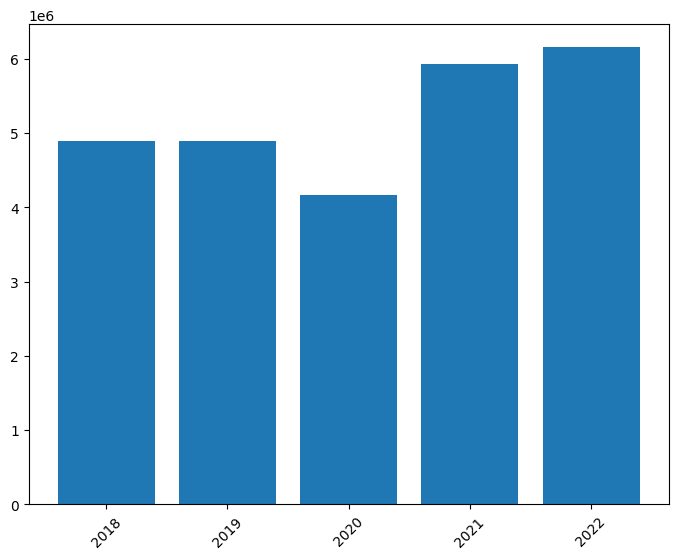

[4898535.0, 4896284.0, 4162071.5, 5930233.0, 6156400.0]
[2018, 2019, 2020, 2021, 2022]


In [111]:
#the following function plots the results for each year since 2018 - 2022
#X-axis has the years
#Y-axis has the value in those respective years

#all_items(periodid=201801)
def years_distribution_plot(year=None):
    year_values = []
    years = [] 
    
    for k,v in yearly_report.items():
        year_values.append(v['sum'])
        years.append(k)
    #print(year_values)
    #get values for each county(y axis) in a list
    all_items(periodid=year)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(years,year_values)
    plt.xticks(rotation=45)
    plt.show()

    print(year_values)
    print(years)
    

years_distribution_plot()